In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
import astropy
import sys
from matplotlib.path import Path

In [2]:
all_data = np.loadtxt('/home/pol/PhD_DATA/DENNIS_MODELS_SMC/smc_debris_w_vel_9solar.txt')

In [31]:
print all_data[0]

[ -57.3972879   -44.20273299   60.47151093  131.20672299    3.441514
 -152.411579    136.2999        0.        ]


In [19]:
map_data = np.loadtxt('/home/pol/Documents/PhD/CMD_SMASH/map_plot_SC_data_1N2019.dat')

In [33]:
smc_fields = map_data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,30,32,33,34]]
outer_fields = map_data[[19,22,23,24,25,26,27,28,29,31,35]]
for i, row in enumerate(map_data):
    print i, row[0]

0 1.0
1 2.0
2 3.0
3 4.0
4 5.0
5 6.0
6 7.0
7 8.0
8 9.0
9 10.0
10 11.0
11 12.0
12 13.0
13 14.0
14 15.0
15 16.0
16 17.0
17 18.0
18 19.0
19 20.0
20 21.0
21 22.0
22 23.0
23 139.0
24 141.0
25 142.0
26 143.0
27 144.0
28 145.0
29 147.0
30 149.0
31 150.0
32 176.0
33 177.0
34 178.0
35 181.0


In [13]:
def phi12_rotmat(alpha,delta):
    '''
    Converts coordinates (alpha,delta) to ones defined by a rotation matrix R_phi12_radec, applied on the original coordinates

    Critical: All angles must be in degrees
    '''
    R_phi12_radec = np.array([[ 0.04842439,  0.30207466, -0.95205356],[-0.99433193,  0.10490506, -0.01728974],[ 0.09465244,  0.9474945 ,  0.30544245]])
    
    vec_radec = np.array([np.cos(alpha*np.pi/180.)*np.cos(delta*np.pi/180.),np.sin(alpha*np.pi/180.)*np.cos(delta*np.pi/180.),np.sin(delta*np.pi/180.)])

    vec_phi12 = np.zeros(np.shape(vec_radec))
    
    vec_phi12[0] = np.sum(R_phi12_radec[0][i]*vec_radec[i] for i in range(3))
    vec_phi12[1] = np.sum(R_phi12_radec[1][i]*vec_radec[i] for i in range(3))
    vec_phi12[2] = np.sum(R_phi12_radec[2][i]*vec_radec[i] for i in range(3))
    
    vec_phi12 = vec_phi12.T

    vec_phi12 = np.dot(R_phi12_radec,vec_radec).T

    phi1 = np.arctan2(vec_phi12[:,1],vec_phi12[:,0])*180./np.pi
    phi2 = np.arcsin(vec_phi12[:,2])*180./np.pi


    return [phi1,phi2]

In [14]:
age_cut = 2.45
coordinates = SkyCoord(all_data.T[0][all_data.T[7] > age_cut]*u.degree, all_data.T[1][all_data.T[7] > age_cut]*u.degree,  all_data.T[2][all_data.T[7] > age_cut]*u.kpc, frame = 'galactic')

In [15]:
ms_l, ms_b = phi12_rotmat(coordinates.icrs.ra.deg, coordinates.icrs.dec.deg)

/home/pol/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  del sys.path[0]
/home/pol/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/home/pol/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size':20})

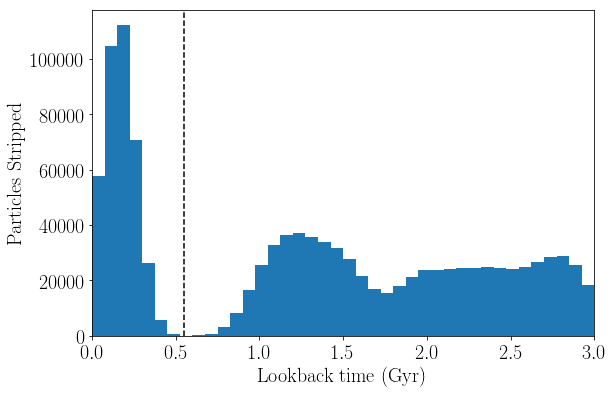

In [12]:
plt.figure(figsize=(9,6))
plt.hist( 3.0 - all_data.T[7], bins = 40)
plt.axvline(x=3.0-age_cut, linestyle='--', c='k')
plt.xlim(0, 3)
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Particles Stripped')
plt.savefig('/home/pol/Documents/PhD/CMD_SMASH/Plots/age_stripping.pdf')
plt.show()

In [17]:
histogram_data, x_bins, y_bins = np.histogram2d(ms_l, ms_b, bins = 500, norm = LogNorm())
plt.imshow(histogram_data)
plt.show()
x_mesh, y_mesh = np.meshgrid(x_bins[:-1] + (x_bins[1]-x_bins[0])/2, y_bins[:-1] + (y_bins[1]-y_bins[0])/2)
print x_mesh.shape

NameError: name 'LogNorm' is not defined

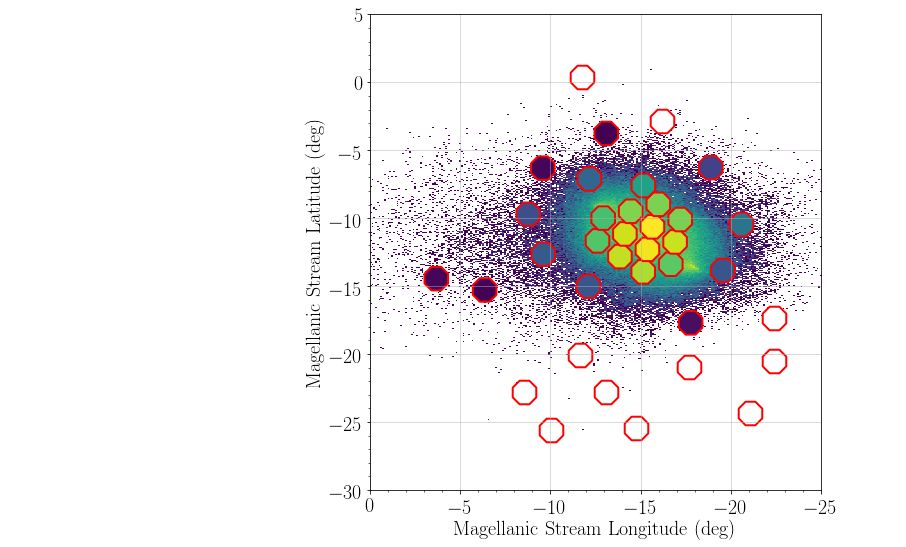

In [34]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
simulation_plot = ax.hist2d(ms_l, ms_b, bins = 500, cmin = 1, norm = matplotlib.colors.LogNorm())
#simulation_plot = ax.scatter(ms_l, ms_b, s = 0.1, c = 'b')
smc_plot = ax.scatter(smc_fields.T[5], smc_fields.T[6], s = 650, edgecolors='red', c = np.log10(smc_fields.T[3]), cmap='viridis', marker = '8', linewidths=2.)
outer_plot = ax.scatter(outer_fields.T[5], outer_fields.T[6], s = 650, edgecolors='red', c = 'white', marker ='8', linewidths=2.)
ax.grid(alpha = 0.6)
ax.set_ylim(-30,5)
ax.set_xlim(0,-25)
ax.set_xlabel('Magellanic Stream Longitude (deg)')
ax.set_ylabel('Magellanic Stream Latitude (deg)')
plt.minorticks_on()
plt.tight_layout()
plt.savefig('/home/pol/Documents/PhD/CMD_SMASH/Plots/Denis_SMC_debris_age_vs_SC_logscale_9solarmass.pdf')
#plt.show()

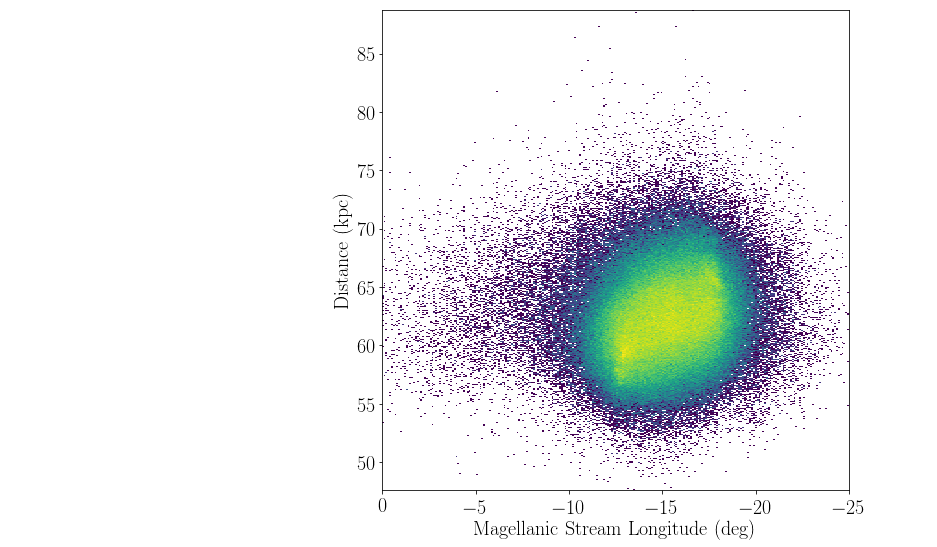

In [14]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
simulation_plot = ax.hist2d(ms_l, coordinates.distance.kpc, bins = 500, cmin = 1, norm = matplotlib.colors.LogNorm())
#simulation_plot = ax.scatter(ms_l, ms_b, s = 0.1, c = 'b')
#smc_plot = ax.scatter(smc_fields.T[5], smc_fields.T[6], s = 500, edgecolors='black', c = 'k', marker = '8')
#outer_plot = ax.scatter(outer_fields.T[5], outer_fields.T[6], s = 500, edgecolors='black', c = 'white', marker ='8')
#ax.grid(alpha = 0.6)
#ax.set_ylim(-30,5)
ax.set_xlim(0,-25)
ax.set_xlabel('Magellanic Stream Longitude (deg)')
ax.set_ylabel('Distance (kpc)')
plt.tight_layout()
plt.savefig('/home/pol/Documents/PhD/CMD_SMASH/Plots/Denis_SMC_debris_age_vs_SC_logscale_distance.png')
plt.show()

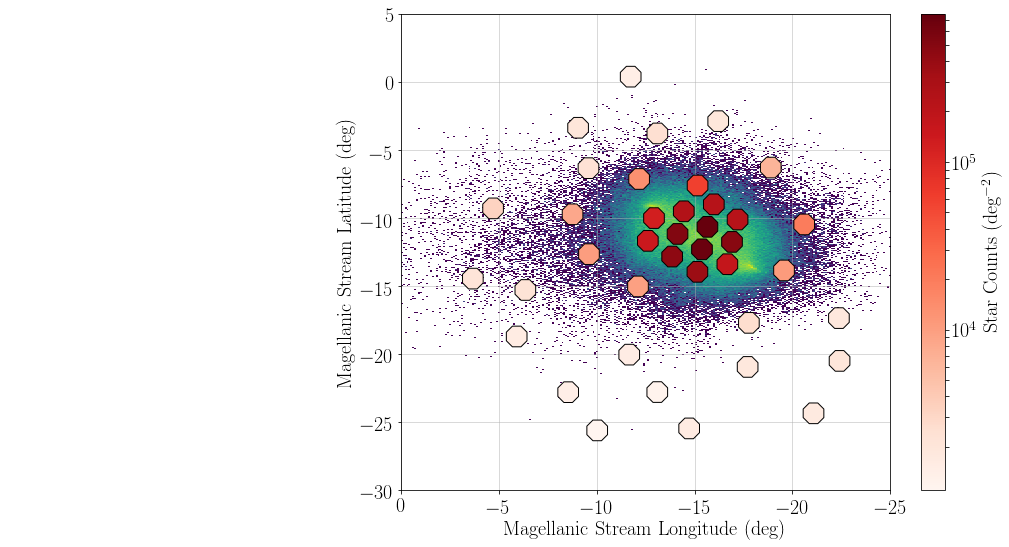

In [20]:
# FOR STAR COUNTS
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#ax.hist2d(ms_l, ms_b, bins = [900,500], cmin=1, norm = matplotlib.colors.LogNorm(), alpha = 0.8, cmap='Purples_r')
#simulation_plot = ax.scatter(ms_l, ms_b, s = 0.1, c = 'k', alpha = 0.3)
simulation_plot = ax.hist2d(ms_l, ms_b, bins = 500, alpha = 1, cmin = 1, norm = matplotlib.colors.LogNorm(), zorder = 1)
#simulation_plot = ax.scatter(ms_l, ms_b, c = 3.0 - all_data.T[7][all_data.T[7] > age_cut], s = 0.1)
data_plot = ax.scatter(map_data.T[5], map_data.T[6], c = map_data.T[3], norm = matplotlib.colors.LogNorm(), cmap = 'Reds', s = 500, edgecolors='black', marker='8', zorder = 2)
cbd = plt.colorbar(data_plot)
cbd.set_label('Star Counts (deg$^{-2}$)')
#cbs = plt.colorbar(simulation_plot)
#cbs.set_label('Simulation Counts')
ax.grid(alpha = 0.6)
ax.set_ylim(-30,5)
ax.set_xlim(0,-25)
ax.set_xlabel('Magellanic Stream Longitude (deg)')
ax.set_ylabel('Magellanic Stream Latitude (deg)')
plt.tight_layout()
plt.savefig('/home/pol/Documents/PhD/CMD_SMASH/Plots/Denis_SMC_debris_age_1_vs_SC_logscale_12M_109mass.png')
plt.show()

Change the plot to only have 2 colors for fields that have SMC stars and the ones that don't. And remove all the colorbars.

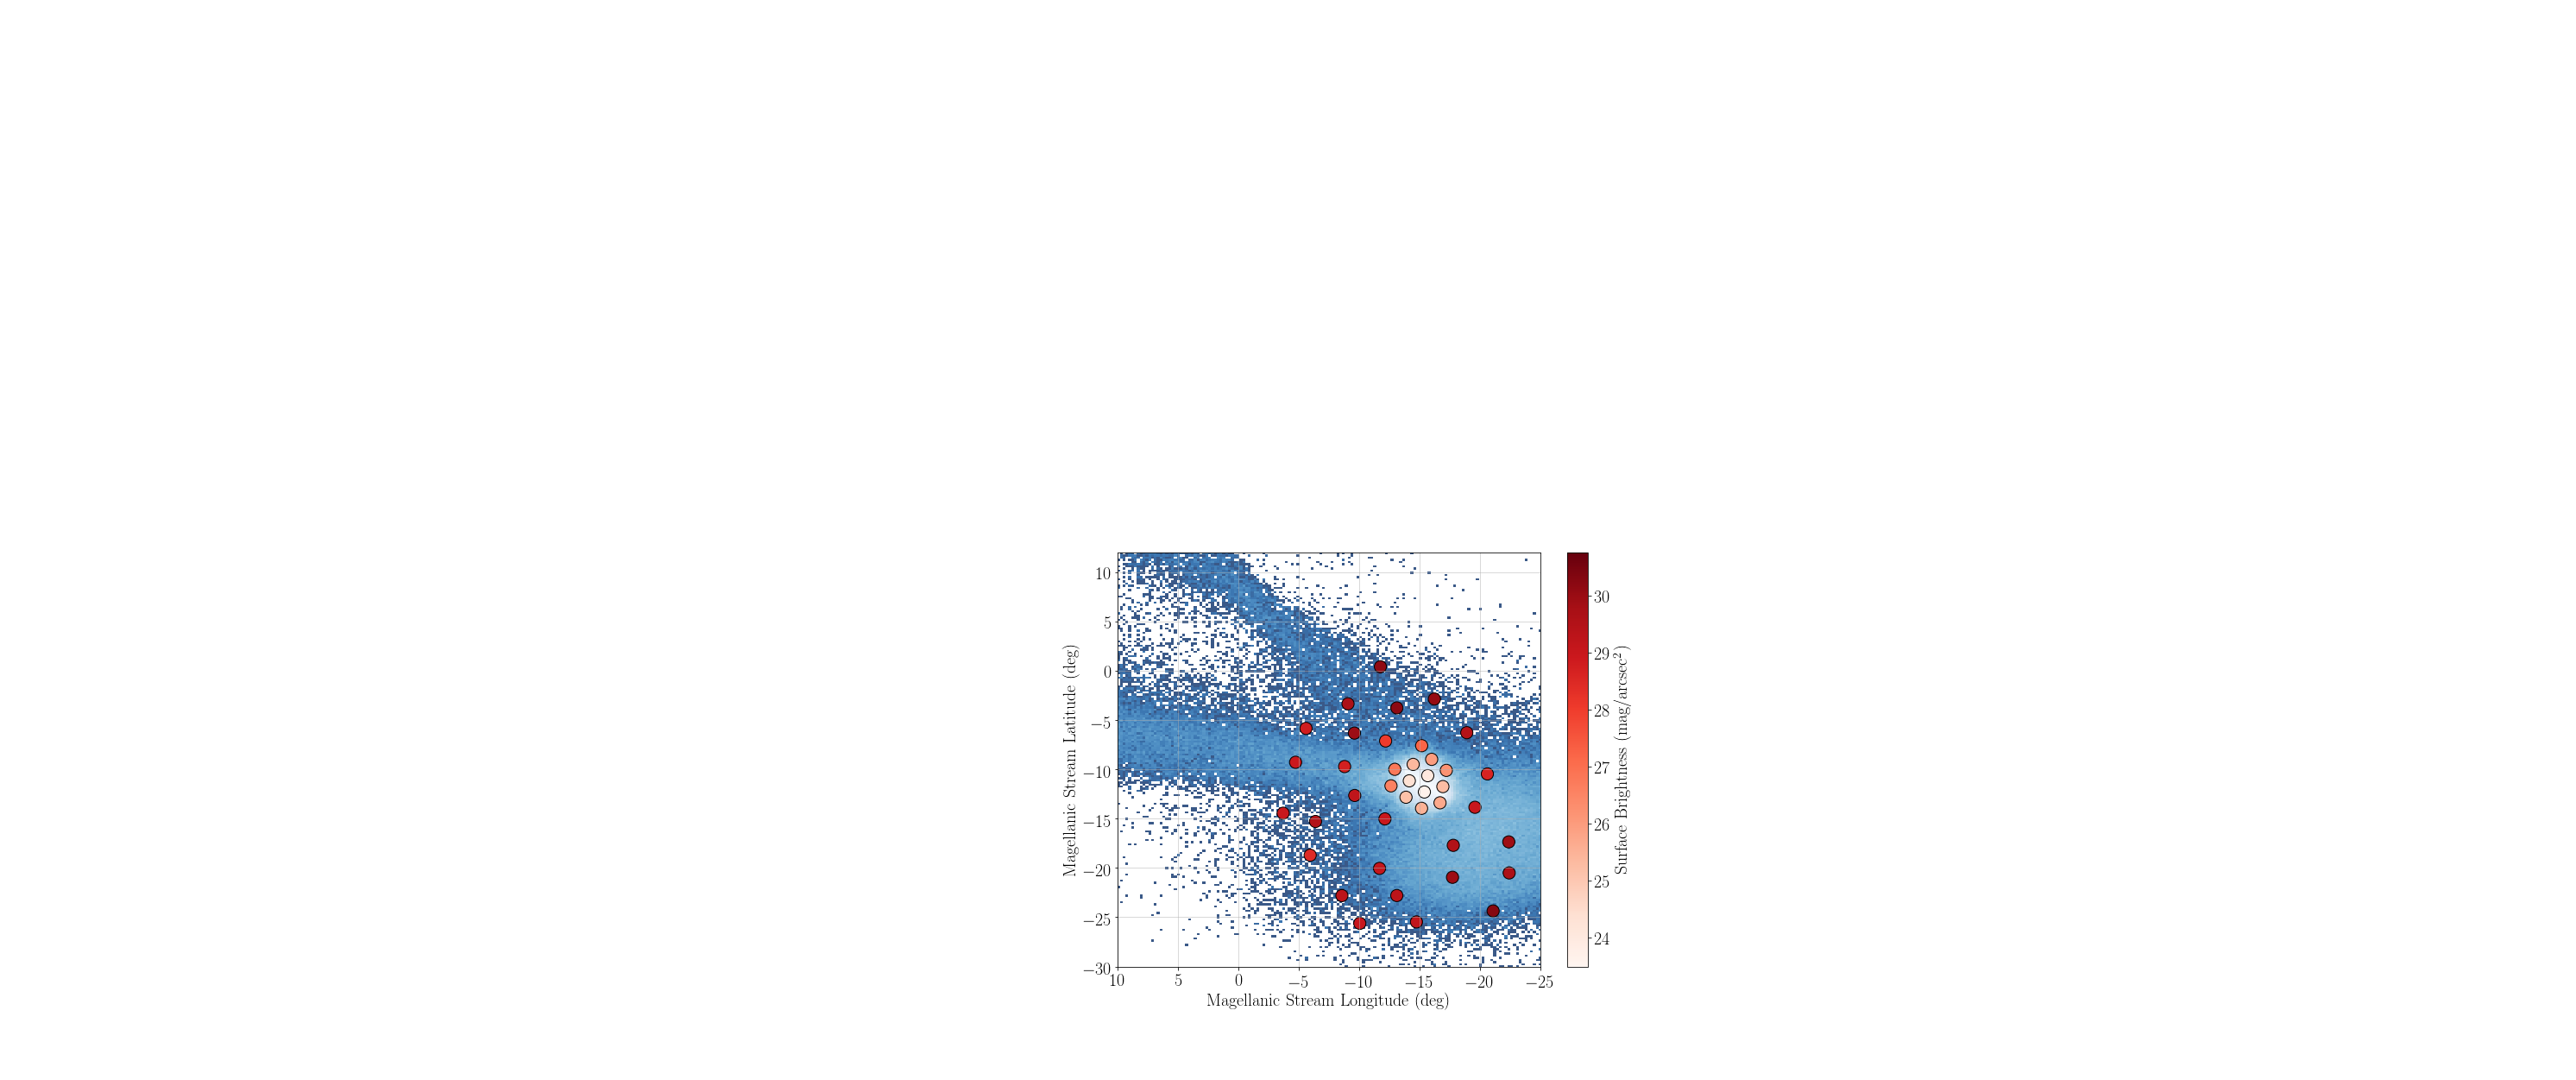

In [13]:
# FOR sURFACE BRIGHTNESS

# values, x_bins, y_bins = np.histogram2d(coordinates.galactic.l.deg, coordinates.galactic.b.deg, bins = 50)

# x, y = np.meshgrid(x_bins[0:-1], y_bins[0:-1])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.hist2d(ms_l, ms_b, bins = [900,500], cmin=1, norm = matplotlib.colors.LogNorm(), alpha = 0.8, cmap='Blues_r')
data_plot = ax.scatter(map_data.T[5], map_data.T[6], c = map_data.T[3], cmap = 'Reds', s = 200, edgecolors='black', vmin=23.5, vmax=30.75)
cbd = plt.colorbar(data_plot)
cbd.set_label('Surface Brightness (mag/arcsec$^2$)')
ax.grid(alpha = 0.6)
ax.set_ylim(-30,12)
ax.set_xlim(10,-25)
ax.set_xlabel('Magellanic Stream Longitude (deg)')
ax.set_ylabel('Magellanic Stream Latitude (deg)')
plt.tight_layout()
plt.savefig('/home/pol/Documents/PhD/CMD_SMASH/Plots/Denis_SMC_debris.png')
plt.show()